###### The cell below loads the visual style of the notebook when run.

In [1]:
from IPython.core.display import HTML
css_file = '../../styles/styles.css'
HTML(open(css_file, "r").read())

# Plotting data with matplotlib

<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span>Learning Objectives</h2>
</div>
</section>

> * How to plot basic x, y data in Python
* How to display images
* How to label axes
* Save plots to many formats, including PNG and PDF
* More complex plots: histograms, 3D plotting, subplots
* String formatting
 
The key to understanding data is to visualise it. The clear presentation of your data is one of the most important tasks for scientists. On a personal level, the horrible plotting options in Excel is one of the reasons a little part of me dies every time a student does their data analysis in a spreadsheet.

There are many Python plotting libraries for display of data but [Matplotlib](http://matplotlib.org/) is the de-facto standard. In this session we'll learn how to display our data using matplotlib. 

Matplotlib is imported like so:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 

If you are using a Python shell, or writing a Python program file (.py), you only need the line that says ```import matplotlib.pyplot as plt```. 

However, if you are running in the Jupyter notebook, and want your plots to display inside the notebook you also need to run the ```%matplotlib inline``` command. This needs to be run **before** importing matplotlib.

## Basic X-Y plots

To get started, let's generate some fake data using numpy - here I'm plotting $y = \sin x$ between 0 and $4\pi$.

In [3]:
import numpy as np
x = np.linspace(0.0,4.0*np.pi,100) #evenly spaced grid of 100 points
y = np.sin(x)

The matplotlib command [plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) is used to plot simple x-y data. Let's read the help for this function. 

In [0]:
plt.plot?

In [4]:
plt.plot(x,y,'k-')
plt.show()

Notice how we used ```plt.show()``` to display the figure we'd created. 

I hope we can agree that the plot above is **awful**. As a bare minimum it needs x-y axis labels. I also feel like a more colorful line:

In [5]:
plt.plot(x,y,'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## More control - figures and axes

When we called the ```plt.plot``` function, it created a figure and a set of axes for us automatically. Quite often in matplotlib, we want to create figure and axis *objects* by hand, and use the axis object to do the plotting. The real advantage of this approach becomes obvious when a figure contains more than one subplot.

The ```plt.subplots``` function will create a figure and axis object for us:

In [6]:
# create figure and axes objects
fig, axes = plt.subplots()

# use axes for plotting
axes.plot(x,y,'r-')
axes.set_ylabel('y') # notice the slightly different style for labels
axes.set_xlabel('x')

plt.show()

## Subplots

Although a little more code is involved, one advantage is that it is easy to add multiple subplots - just provide the ```plt.subplots``` function with the number of rows and columns:

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2)
# axes is a 2x2 list of axis objects

for i in range(2):
    for j in range(2):
        print("Plotting on subplot: i=",i," j=",j)
        axis = axes[i,j]

        axis.plot(x,y,'b-')
        axis.set_xlabel('x')
        axis.set_ylabel('y')

plt.show()

This is nice, but the overlapping labels are an issue. The ```fig``` object has a function called ```tight_layout``` that will fix that for us: 

In [8]:
fig, axes = plt.subplots(nrows=2,ncols=2)

for i in range(2):
    for j in range(2):
        axis = axes[i,j]

        axis.plot(x,y,'b-')
        axis.set_xlabel('x')
        axis.set_ylabel('y')

fig.tight_layout()
plt.show()

## Multiple lines and legends

What if I want to plot several lines on the same figure? You can just make multiple calls to the ```plot``` function. The ```plot``` function also has an optional ```label``` argument that helps us label each line:

In [9]:
x = np.linspace(0,4.0*np.pi,100)

fig, axis = plt.subplots()
axis.plot(x, np.cos(x), 'r-', label='cos')
axis.plot(x, np.sin(x), 'b-', label='sin')

axis.set_xlabel('x')
axis.set_ylabel('y')

axis.legend() # draw a legend on figure

plt.show()

## Limits 

The graph above is OK, but I'm unhappy with the limits. You can set the x and y limits with ```set_xlim``` and ```set_ylim```:

In [11]:
x = np.linspace(0,4.0*np.pi,100)

fig, axis = plt.subplots()
axis.plot(x, np.cos(x), 'r-', label='cos')
axis.plot(x, np.sin(x), 'b-', label='sin')

axis.set_xlabel('x')
axis.set_ylabel('y')

axis.legend() # draw a legend on figure

axis.set_ylim(-1.5,2.0)
axis.set_xlim(0.0, 4.0*np.pi)

plt.show()

Much nicer!

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span>Simple X-Y plots</h2>
</div>
</section>

> On *one figure*, plot $y = \sin x$, $y = \cos x$ and $y = \tan x$ between $-\pi/2 < x < \pi/2$. Plot $\tan x$ with a dotted line, add a legend, and make sure that the limits are set sensibly.

In [12]:
# insert your code here

## Figure size and saving figures

We can set the figure size by passing an argument to the ```subplots``` function. The ```figsize``` argument is the width and height of the figure in inches. We can also set the DPI (dots-per-inch) of the figure the same way:

In [13]:
fig, axis = plt.subplots(figsize=(10,3), dpi=100)

x = np.linspace(0.0,2*np.pi,100)
axis.plot(x,np.cos(x),'r-')
axis.set_xlabel('x')
axis.set_ylabel('y')
plt.show()

### Saving figures

To save a figure to a file we can use the ```savefig``` method in the ```fig``` object:

In [0]:
fig, axis = plt.subplots(figsize=(10,3), dpi=100)

x = np.linspace(0.0,2*np.pi,100)
axis.plot(x,np.cos(x),'r-')
axis.set_xlabel('x')
axis.set_ylabel('y')
fig.savefig('filename.png')

A couple of things to note: many file formats are supported, notably PNG, JPG, PDF and SVG. You must call ```savefig``` **before** calling ```plt.show``` - the latter "empties" the figure object, so calling ```savefig``` afterwards will not do anything.

## Formatting lines, labels, axes

The plots shown so far are fine, but quite often we want to be able change the font sizes, line colors, line widths, line styles, etc. Matplotlib provides literally endless opportunities for plot formatting. Rather than go into them all here, I have provided a [reference notebook](01a_plotformatting.ipynb) which you can use as a guide to make neatly formatted plots for publication.

---

## Other 2D plots

The ```plot``` method is fine for x, y line plots, but there are a number of other functions for making different kinds of plots. For a gallery of all the types of plots, you can look at the [matplotlib gallery](http://matplotlib.org/gallery.html) - each figure in the gallery shows the code used to produce it. Some of the more useful examples are shown below.

### Histograms

The example below generates 100,000 Gaussian random numbers, and plots the histogram and a 'normed' histogram, whose total area adds up to 1.

In [14]:
nums = np.random.normal(loc=0,scale=1,size=100000)
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

axes[0].hist(nums, bins=30)
axes[0].set_title('Histogram')

axes[1].hist(nums, bins=30, normed=True)
axes[1].set_title('Normed Histogram')

plt.show()

### Errorbar plots

If we're going to plot real data we need to be able to plot x,y data with errorbars! In the cell below I'm going to load in some example data - the brightness vs. time of an exoplanet host, Wasp-12. The data file format looks like this

```
54835.817914435 1.0027e+00 1.5118e-03
54835.818901894 1.0046e+00 1.5249e-03
54835.819911092 1.0029e+00 1.4443e-03
54835.820920291 1.0016e+00 1.4374e-03
```

The three columns are time, flux and error.

In [15]:
x,y,e = np.loadtxt('../../data/Session2/wasp12.txt',unpack=True)

Now I can use the ```errorbar``` function to plot this data. By default the ```errorbar``` command will join up the points with a line, note how I disable this line, and set the marker style:

In [16]:
fig, axis = plt.subplots()

axis.errorbar(x,y,yerr=e, marker='.', ls='none')
axis.set_xlabel('Time (Modified Julian Date)')
axis.set_ylabel('Flux')

plt.show()

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span>Error bar plots</h2>
</div>
</section>

> Tidy up the error bar plot above:
* the x-axis data start at 54835.8179... Subtract off the integer part and adjust the x-axis label to reflect this
* Change the errorbar and marker color to red
* adjust the transparency (alpha) of the points to 0.8
* Change the y-axis label to "Normalised Flux"
* Remove the horizontal "caps" from the error bars

> You might find it useful to look at the help for the errorbar function.

In [17]:
# WRITE YOUR CODE HERE

### Scatter plots

The ```scatter``` function is useful for scatter plots, particularly ones where you want marker sizes and colours to differ:

In [18]:
N = 50
x = np.random.uniform(size=N)
y = np.random.uniform(size=N)
colors = np.random.uniform(size=N)
area = np.pi * (15 * np.random.uniform(size=N))**2 # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

## Image plots

One thing that astronomers do a lot of is plotting images! Matplotlib has excellent support for plotting images. Here I will use the ```astropy``` library to load a FITS image of the Pleiades (there'll be more on reading FITS images in a later session).

In [19]:
import astropy.io.fits as fits
image = fits.getdata('../../data/Session2/pleiades.fits')

# image is just a numpy array
print (image.mean())
print (image.std())
print (image.shape)

We can see the image is 875x875 pixels. We can use the ```imshow``` command to plot this image:

In [20]:
fig, axis = plt.subplots(figsize=(10,10))
axis.imshow(image)
plt.show()

This is not great. The [colormap](../../resources/reference.html#colormap) looks like an unusual choice for stars, and the image doesn't seem to be the right way up.

The reason for the image orientation is that it is a convention in computer graphics for the [0,0] element of the array in the upper left. We would normally think of the [0,0] array element being bottom left.

We'll go into more detail about plotting images in the session on image handling, but for now let's change the [colormap](../../resources/reference.html#colormap) to be a greyscale, and fix the location of the origin.

In [21]:
fig, axis = plt.subplots(figsize=(10,10))
implot = axis.imshow(image, cmap=plt.get_cmap('Greys'), origin='lower')
axis.grid(False)
plt.show()

## 3d Plots

We won't go into 3D plotting in much detail. but it's worth pointing out that 3D axes can be created by creating a figure and calling the "get current axis" function ```gca``` with the ```projection='3d'``` argument:

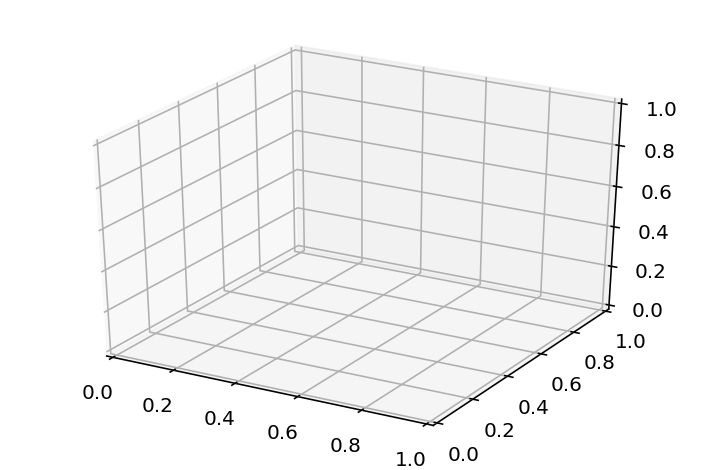

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
axis = plt.gca(projection='3d')

As a quick example, I've made a 3D scatter plot of some random points below. For more information on 3D plotting in matplotlib, see the tutorial [here](https://beta.oreilly.com/learning/three-dimensional-plotting-in-matplotlib).

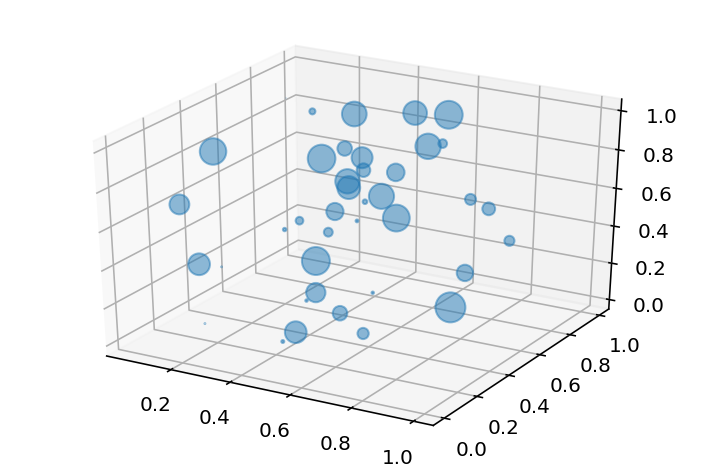

In [5]:
# rather than embed in notebook, uncomment the line below to 
# plot outside the notebook. For 3D plots, this allows interaction

#%matplotlib gtk

N = 40
x = np.random.uniform(size=N)
y = np.random.uniform(size=N)
z = np.random.uniform(size=N)
area =  15 * np.random.uniform(size=N)

fig = plt.figure()
axis = plt.gca(projection='3d')
axis.scatter(x,y,z,s=area**2,alpha=0.5)
plt.show()

---
## Printing out formatted text

As well as plotting graphs, printing out nicely formatted text can be important for presenting your results. In Python 3 this is done using the ```format``` method. All Python strings have a format method, which is used like so

In [6]:
x = 100.1010101
a_string = "The value of x is {}"
print (a_string.format(x))

The value of x is 100.1010101


The ```format``` method works by replacing any curly brackets within the string by the arguments it is given. You can use as many curly brackets as you like:

In [7]:
x = np.random.normal(loc=10,scale=1,size=100000)
a_string = "The mean of x is {}, the standard deviation is {}"
print (a_string.format( x.mean(), x.std() ))

The mean of x is 9.997522913719243, the standard deviation is 0.997330209251566


What if we want to change the number of decimal places? Python has a number of *string formatting codes* that allow us to specify how we want the string to look. For example, decimal numbers are formatted with a code like ```:.2f``` which means "print out a floating point number with 2 decimal places:

In [8]:
x = np.random.normal(loc=10,scale=1,size=100000)
a_string = "The mean of x is {:.2f}, the standard deviation is {:.2f}"
print (a_string.format( x.mean(), x.std() ))

The mean of x is 10.00, the standard deviation is 1.00


Rather than produce a complete view of string formatting I'll refer you to this [nice online guide](https://mkaz.com/2012/10/10/python-string-format/).

---------
<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h1>Homework #2</h1>
<h2><span class="fa fa-pencil"></span>Plotting and working with data</h2>
</div>
</section>

> This homework blends together elements of last week's session on numpy arrays and file IO with this week's session on plotting data. 

> The file located at "../../data/Session2/gapminderDataFiveYear.csv" looks like this

>``` 
country,year,pop,continent,lifeExp,gdpPercap
0,1952,8425333.0,3,28.801,779.4453145
0,1957,9240934.0,3,30.332,820.8530296
0,1962,10267083.0,3,31.997,853.10071
0,1967,11537966.0,3,34.02,836.1971382
0,1972,13079460.0,3,36.088,739.9811058
0,1977,14880372.0,3,38.438,786.11336```
>
> As you can see, it contains life expectancy and GDP data for a range of countries over a range of years up until 2007. Your job this week will be to show this data using matplotlib's scatter function. For example, a plot for the year 2007 might look something like this:
> <img src="../../images/rosling_plot_2007.svg"/>

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-question"></span>Question 1 (4 points)</h2>
</div>
</section>

> Write a function to read in the data file and return a 2D numpy array of population, continent, life expectancy and GDP (in that order) *for a given year*. Your function should raise an ```ValueError``` if there is no data for that year.

> The function template below is given as a guide to help you. Read the function documentation carefully, to see how it should work, and take a close look at the tests, to see an example of the function in use.

> As a hint, remember that you can use fancy slicing on a numpy array to make a mask which will selet only those rows that match a given year.

> **Remember, your homework will be marked in part based on whether it passes the tests after each question. Make sure your code passes these tests!**

In [0]:
def get_data(year):
    """
    Read in the data for a given year.

    Arguments
    ---------
    year : int
        the year for which we want to obtain data

    Returns
    --------
    data : np.ndarray
        a 2D array containing population, continent, life expectancy and GDP data for the given year

    Raises
    ------
    ValueError : if no data exists for the given year
    """
    # defensive programming - make sure year is an integer
    year = int(year)
    # YOUR CODE HERE

In [0]:
from nose.tools import assert_equal, assert_almost_equal
data = get_data(2007)
assert_equal(data.shape, (142,4)) # all years should have 142 countries, 4 columns
assert_almost_equal(np.median(data[:,0]), 10517531.0) # median population

In [0]:
from nose.tools import assert_raises
assert_raises(ValueError,get_data,2008)

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-question"></span>Question 2 (1 points)</h2>
</div>
</section>

> Remember how, in the bootcamp, we glued together functions we wrote to make more complex code. Below we will use the ```get_data``` function you wrote above in a new function, which will select the data for a *single* continent.

> Complete the code below to make a function to select data from a single continent from the results of your ```get_data``` function. The continent column in the data is a list of numbers which follows the following convention:
 1. = Africa
 2. = Americas
 3. = Asia
 4. = Europe
 5. = Oceania

> As before, use the documentation and the tests to understand how the function should work, and the code that's already written as a stub you can complete to get a working function that passes the tests. 

> Hint: Once again, the key is to use fancy slicing to select only the data you are interested in.


In [0]:
def get_continent(continent_id, data):
    """
    From a 2D data array, select and return only that data which originates from the given continent

    Arguments
    ---------
    continent_id: integer
		an integer identifying the continent we want data for. Follows the convention
        	1 = Africa
            2 = Americas
            3 = Asia
            4 = Europe
            5 = Oceania

    data : np.ndarray
        2D array containing data on population, continent, life expectancy and GDP for all continents

    Returns
    -------
    outdata : np.ndarray
        2D array containing data on population, continent, life expectancy and GPD for selected continent only.
    """
    # DEFENSIVE PROGRAMMING
    # make sure continent is an integer
    assert isinstance(continent, int), "continent argument should be an integer"
    # make sure it is a known continent
    assert continent in [1, 2, 3, 4, 5], "Unknown continent"

    # YOUR CODE HERE

In [0]:
from nose.tools import assert_equal
data = get_data(2007)
europe = get_continent(4, data)
assert_equal(europe.shape, (30,4))

<section class="challenge panel panel-success"> 
<div class="panel-heading">
<h2><span class="fa fa-question"></span>Question 2 (5 points)</h2>
</div>
</section> 

> Complete the function below to plot a scatter plot like the one shown above. GDP per person should be on the x-axis, which should be on a log scale. Life expectancy in years is the y-axis. Points should be colour coded according to continent and the plot should have a legend indicating this colour scheme. The size of the point should be proportional to the population

> Use your function to plot the life expectancy data for 1972 and 2007.

> *Hint 1: call plt.scatter once for each continent*

> *Hint 2: Search the web and find out how to make your legend display only one symbol per continent, and make those symbols all the same size*


In [0]:
def plot_scatter(year):
    """
    Plot a scatter diagram of GDP vs life expectancy for a given year.
    """
    # make a figure object
    fig,axes = plt.subplots(figsize=(11,9))

    # get the data for this year
    data = get_data(year)

    # a list of continent ids
    continents = ['Africa','Americas','Asia','Europe','Oceania']

    # a list of colors to go with each continent
    colors     = ["#9b59b6", "#3498db", "#2ecc71", "#e74c3c", "#34495e"]

    # we use a for loop to repeat the job of plotting each continent
    for continent_id in range(1, 5):
        # notice how I use the continent ID to select the color for this plot
        color = colors[continent_id]
        # YOUR CODE HERE

plot_scatter(1972)
plot_scatter(2007)

<section class="panel panel-warning"> 
<div class="panel-heading">
<h2><span class="fa fa-question"></span>Extra Credit (2 points)</h2>
</div>
</section>

> Extra credit questions allow you to make up for marks dropped in this and other homeworks. You can't score more than 100% overall, but if you get 2 extra credit points this week, and lose 2 points next week, you'd still be on course for 100% marks. I don't expect you to answer extra credit questions, *unless you want to*.

> For extra credit this week, have a look at this [tutorial](http://earthpy.org/pyncview_pm.html) for the ```interact``` feature in the Jupyter notebook. The ```interact``` feature allows you to make interactive plots. Use it to make an interactive plot with a slider that you can drag to change the year. 

> You might want to know that the dataset contains data every five years, starting at 1952 and ending in 2007.

In [0]:
# YOUR CODE HERE